**Librerias**

*Selecci√≥n e importaci√≥n:* las librerias seleccionadas e importadas a continuaci√≥n son las necesarias para realizar un an√°lisis exploratorio del DataFrame "Peliculas".

In [91]:
#Importaci√≥n de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder




# **An√°lisis exploratorio de datos**

*Caracterizaci√≥n del DataFrame:* Se determin√≥ cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [92]:
df = pd.read_csv('Movie_Data_File.csv')


In [93]:
df.head()

Film_title  Release_year         Director  \
0              The Fan           NaN  Eckhart Schmidt   
1   Mad Max: Fury Road           NaN    George Miller   
2             Suspiria           NaN    Dario Argento   
3  Lost in Translation           NaN    Sofia Coppola   
4                Akira           NaN  Katsuhiro Otomo   

                                                Cast  Average_rating  \
0  ['D√©sir√©e Nosbusch', 'Bodo Staiger', 'Simone B...            3.57   
1  ['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...            4.18   
2  ['Jessica Harper', 'Stefania Casini', 'Flavio ...            3.93   
3  ['Bill Murray', 'Scarlett Johansson', 'Akiko T...            3.79   
4  ['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...            4.28   

   Owner_rating                                      Genres  Runtime  \
0           NaN                         ['Horror', 'Drama']     92.0   
1           4.5  ['Adventure', 'Science Fiction', 'Action']    121.0   
2           4.0                                  ['Horror']     99.0   
3           4.5              ['Drama', 'Comedy', 'Romance']    102.0   
4           5.0  ['Animation', 'Action', 'Science Fiction']    124.0   

              Countries Original_language  ...     ‚òÖ¬Ω     ‚òÖ‚òÖ    ‚òÖ‚òÖ¬Ω     ‚òÖ‚òÖ‚òÖ  \
0           ['Germany']            German  ...    103    402    525    1660   
1  ['Australia', 'USA']           English  ...   6139  37471  30112  158356   
2             ['Italy']           English  ...   2710  11006  14397   53427   
3         ['UK', 'USA']           English  ...  11281  45997  46716  155110   
4             ['Japan']          Japanese  ...   1663   7286   9544   40850   

     ‚òÖ‚òÖ‚òÖ¬Ω    ‚òÖ‚òÖ‚òÖ‚òÖ   ‚òÖ‚òÖ‚òÖ‚òÖ¬Ω   ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ  Total_ratings  \
0    1950    2646     808     714           9042   
1  163753  477901  280815  511140        1682389   
2   70309  138742   60628   88628         443757   
3  166638  314160  122359  193717        1076949   
4   61104  168485  112657  196532         600721   

                                           Film_URL  
0         https://letterboxd.com/film/the-fan-1982/  
1    https://letterboxd.com/film/mad-max-fury-road/  
2             https://letterboxd.com/film/suspiria/  
3  https://letterboxd.com/film/lost-in-translation/  
4                https://letterboxd.com/film/akira/  

[5 rows x 29 columns]

In [94]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [95]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
¬Ω                      int64
‚òÖ                      int64
‚òÖ¬Ω                     int64
‚òÖ‚òÖ                     int64
‚òÖ‚òÖ¬Ω                    int64
‚òÖ‚òÖ‚òÖ                    int64
‚òÖ‚òÖ‚òÖ¬Ω                   int64
‚òÖ‚òÖ‚òÖ‚òÖ                   int64
‚òÖ‚òÖ‚òÖ‚òÖ¬Ω                  int64
‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ                  int64
Total_ratings          int64
Film_URL              object
dtype: object

# **Analisis de variables categoricas**

## *Elenco*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [96]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2])
    return pd.Series([None, None])

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [97]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['D√©sir√©e Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [98]:
df['Protagonista'] = df['Protagonista'].astype(str)

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [99]:
df['Coprotagonista'] = df['Coprotagonista'].astype(str)

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [100]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                 57
Mel Blanc            49
Nicolas Cage         36
Sean Connery         33
Johnny Depp          33
                     ..
Madonna               1
Jonathan Lipnicki     1
Martina Gedeck        1
Halina Reijn          1
Olivia Wilde          1
Name: count, Length: 5064, dtype: int64


In [101]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
nan                 86
None                57
Tommy Lee Jones     14
Robert De Niro      14
Rose Byrne          13
                    ..
Kristen Connolly     1
Josefine Preu√ü       1
Aylin Tezel          1
Julia Koschitz       1
Allison Williams     1
Name: count, Length: 6284, dtype: int64

## *G√©neros*

Eliminar datos de la columna Genres, dejando solamente el primero

In [102]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [103]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [104]:
df['Genres'] = df['Genres'].astype(str)

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [105]:
print("\nValores √∫nicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores √∫nicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga.

In [106]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [107]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [108]:
#Comprobamos la eliminaci√≥n
print("\nValores √∫nicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores √∫nicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [109]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


## *Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [110]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [111]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [112]:
print("\nValores √∫nicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores √∫nicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['Indi

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [113]:
df['Countries'] = df['Countries'].astype(str)

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [114]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga.

Primero veremos cuantas filas contienen ' '

In [115]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [116]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [117]:
#Comprobamos la eliminaci√≥n
print("\nValores √∫nicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores √∫nicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'B

Realizamos el conteo

In [118]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
                                     ... 
Netherlands Antilles                    1
Mongolia                                1
Benin                                   1
"Lao Peoples Democratic Republic"       1
Morocco                                 1
Name: count, Length: 90, dtype: int64


## *Productoras*

Eliminar datos de la columna Studios, dejando solamente el primero

In [119]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [120]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [121]:
df['Studios'] = df['Studios'].astype(str)

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [122]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures           303
Universal Pictures           249
                             222
Columbia Pictures            217
Warner Bros. Pictures        203
                            ... 
Futura Films                   1
C.A.P.A.C.                     1
Carlton Film Export            1
Films Jean Alexandre           1
Testa Gay Cinematografica      1
Name: count, Length: 4522, dtype: int64


## *Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [123]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [124]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones           54
Cirio H. Santiago     41
Antonio Margheriti    39
William Witney        33
Steven Spielberg      31
                      ..
Yuval Adler            1
Ali Selim              1
Jean Negulesco         1
Clement Virgo          1
Kazuo Komizu           1
Name: count, Length: 4473, dtype: int64


## **Columnas**

*Creaci√≥n de nueva variable*

Variable Porcentje_Likes

In [125]:
df['Porcentaje_likes'] = (df['Likes'] / df['Watches'])*100
print(df.columns)

Index(['Film_title', 'Release_year', 'Director', 'Average_rating',
       'Owner_rating', 'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '¬Ω', '‚òÖ', '‚òÖ¬Ω', '‚òÖ‚òÖ', '‚òÖ‚òÖ¬Ω', '‚òÖ‚òÖ‚òÖ',
       '‚òÖ‚òÖ‚òÖ¬Ω', '‚òÖ‚òÖ‚òÖ‚òÖ', '‚òÖ‚òÖ‚òÖ‚òÖ¬Ω', '‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ', 'Total_ratings', 'Film_URL',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


## *Eliminaci√≥n de columnas*

Eliminamos las columnas que no utilizaremos para aplicar el modelo de aprendizaje supervisado, ya sea porque no son objeto de nuestro analisis o porque repiten informaci√≥n.

In [126]:
#Eliminaci√≥n de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener informaci√≥n necesaria para nuestro an√°lisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', 'Likes' ,  '¬Ω' , '‚òÖ' , '‚òÖ¬Ω' , '‚òÖ‚òÖ' , '‚òÖ‚òÖ¬Ω' , '‚òÖ‚òÖ‚òÖ' , '‚òÖ‚òÖ‚òÖ¬Ω' , '‚òÖ‚òÖ‚òÖ‚òÖ' , '‚òÖ‚òÖ‚òÖ‚òÖ¬Ω' , '‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ','Film_URL'])

In [127]:
#Comprobamos la eliminaci√≥n de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Total_ratings          int64
Protagonista          object
Coprotagonista        object
Porcentaje_likes     float64
dtype: object

*Traducci√≥n del nombre de las columnas*

In [128]:
#Cambio del nombre de las columnas
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificaci√≥n_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duraci√≥n' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripci√≥n' , 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificaci√≥n_promedio', 'Genero', 'Duraci√≥n',
       'Pais', 'Lenguaje', 'Descripci√≥n', 'Productora', 'Vistas', 'Ratings',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


## **Valores faltantes**

*Identificacion de valores faltantes y manejo*

In [129]:
#Identificaci√≥n de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificaci√≥n_promedio    522
Genero                     0
Duraci√≥n                   8
Pais                       0
Lenguaje                   0
Descripci√≥n                2
Productora                 0
Vistas                     0
Ratings                    0
Protagonista               0
Coprotagonista             0
Porcentaje_likes           0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [130]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje m√°ximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje m√°ximo de valores nulos por columna es igual a 5.29 %


La falta de datos num√©ricos es aleatoria y por lo tanto los manejaremos a trav√©s de la *Imputaci√≥n Simple* utilizando la media, ya que con la *Eliminaci√≥n de filas* perder√≠amos infrmaci√≥n importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputaci√≥n no cambiara la distribuci√≥n de nuestros datos.

**Se utiliza SimpleImputer(strategy='mean') para completar Calificaci√≥n_promedio y Duraci√≥n.**

In [131]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificaci√≥n_promedio']=imp.fit_transform(df[['Calificaci√≥n_promedio']])

In [132]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duraci√≥n']=imp.fit_transform(df[['Duraci√≥n']])

In [133]:
#Compruebo que la imputaci√≥n de los datos num√©ricos se realiz√≥ con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificaci√≥n_promedio    0
Genero                   0
Duraci√≥n                 0
Pais                     0
Lenguaje                 0
Descripci√≥n              2
Productora               0
Vistas                   0
Ratings                  0
Protagonista             0
Coprotagonista           0
Porcentaje_likes         0
dtype: int64

## Eliminaci√≥n de datos faltantes categ√≥ricos

Se eliminan filas con NaN en "Descripci√≥n".

In [134]:
df = df.dropna(subset=['Descripci√≥n'], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9871 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9871 non-null   object 
 1   Director               9871 non-null   object 
 2   Calificaci√≥n_promedio  9871 non-null   float64
 3   Genero                 9871 non-null   object 
 4   Duraci√≥n               9871 non-null   float64
 5   Pais                   9871 non-null   object 
 6   Lenguaje               9871 non-null   object 
 7   Descripci√≥n            9871 non-null   object 
 8   Productora             9871 non-null   object 
 9   Vistas                 9871 non-null   int64  
 10  Ratings                9871 non-null   int64  
 11  Protagonista           9871 non-null   object 
 12  Coprotagonista         9871 non-null   object 
 13  Porcentaje_likes       9871 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


# **Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [135]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificaci√≥n_promedio', 'Duraci√≥n', 'Vistas', 'Ratings',
       'Porcentaje_likes'],
      dtype='object')


Visualizaci√≥n de distribuci√≥n y valores extremos para luego seleccionar la estrategia de manejo.

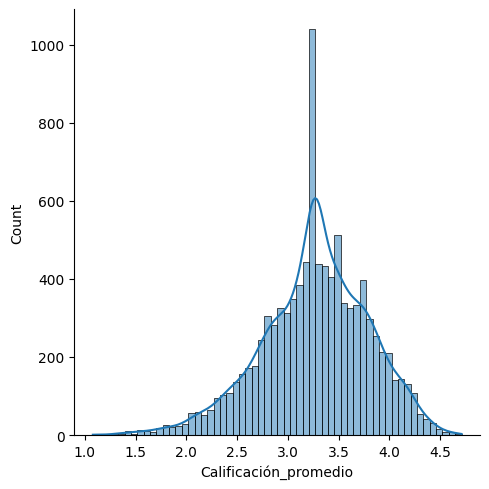

In [136]:
sns.displot(df['Calificaci√≥n_promedio'], kde=True)
sns.despine()

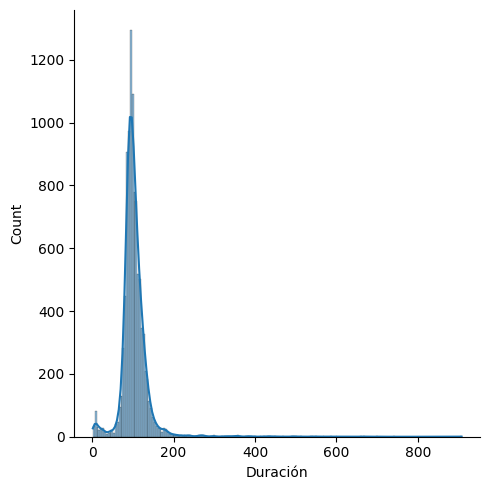

In [137]:
sns.displot(df['Duraci√≥n'], kde=True)
sns.despine()

Debido a que las variables Calificaci√≥n promedio y Duraci√≥n presentan distribuci√≥n normal utilizaremos zscore a Calificaci√≥n_promedio y Duraci√≥n para detectar outliers.

### *Calificaci√≥n_promedio*

In [138]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificaci√≥n_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificaci√≥n_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificaci√≥n_promedio    zscore
157                    1.49 -3.370698
650                    1.57 -3.219093
1050                   1.66 -3.048536
1100                   1.65 -3.067487
1172                   1.68 -3.010635
1705                   1.35 -3.636009
1827                   1.43 -3.484403
1993                   1.56 -3.238043
2506                   1.28 -3.768664
2575                   1.49 -3.370698
2935                   1.53 -3.294896
3215                   1.63 -3.105388
3220                   1.11 -4.090826
3221                   1.40 -3.541255
3222                   1.54 -3.275945
3223                   1.57 -3.219093
3227                   1.62 -3.124339
3812                   1.34 -3.654959
4176                   1.24 -3.844467
4178                   1.29 -3.749713
4333                   1.60 -3.162240
4366                   1.44 -3.465452
4367                   1.68 -3.010635
4531                   1.52 -3.313846
4652        

In [139]:
print("Valor m√≠nimo:", df['Calificaci√≥n_promedio'].min())
print("Valor m√°ximo:", df['Calificaci√≥n_promedio'].max())

Valor m√≠nimo: 1.08
Valor m√°ximo: 4.71


La calificaci√≥n promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

### *Duraci√≥n*

In [140]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duraci√≥n'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duraci√≥n', 'zscore']])

Cantidad de outliers encontrados: 105
      Duraci√≥n     zscore
12       228.0   3.297172
145      233.0   3.429602
369      467.0   9.627332
717      379.0   7.296562
889      316.0   5.627942
...        ...        ...
9908     600.0  13.149973
9909     300.0   5.204166
9916     585.0  12.752683
9994     344.0   6.369551
9996     270.0   4.409585

[105 rows x 2 columns]


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [141]:
top10 = df.sort_values(by='Duraci√≥n', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vall√©e   
9166                    I, Claudius              Herbert Wise   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   

      Calificaci√≥n_promedio       Genero  Duraci√≥n     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  Engl

Cuando analizamos los ouliers de duraci√≥n observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripci√≥n que nos indiquen cuantas hay.

In [142]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripci√≥n = str(row['Descripci√≥n']).lower() if pd.notna(row['Descripci√≥n']) else ''
    text = Titulo + Descripci√≥n
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1077


Eliminamos las series

In [143]:
df = df[~df['is_series']]

Volvemos a realizar el analisis de los outliers

In [144]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duraci√≥n'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duraci√≥n', 'zscore']])

Cantidad de outliers encontrados: 88
      Duraci√≥n     zscore
12       228.0   3.398041
145      233.0   3.534422
369      467.0   9.917053
717      379.0   7.516747
889      316.0   5.798346
...        ...        ...
9835     326.0   6.071108
9908     600.0  13.544787
9909     300.0   5.361927
9916     585.0  13.135644
9994     344.0   6.562080

[88 rows x 2 columns]


In [145]:
top10 = df.sort_values(by='Duraci√≥n', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vall√©e   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   
8689                      The Stand                Josh Boone   

      Calificaci√≥n_promedio       Genero  Duraci√≥n     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  Engl

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [146]:
df = df[df['Duraci√≥n'] <= 210.0]

# Mostrar cantidad de filas antes y despu√©s
print("Filas originales:", len(df))
print("Filas despu√©s del filtrado:", len(df))

Filas originales: 8704
Filas despu√©s del filtrado: 8704


In [147]:
top10 = df.sort_values(by='Duraci√≥n', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
3071            Boccaccio '70          Vittorio De Sica   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificaci√≥n_promedio           Genero  Duraci√≥n       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000     

Observamos que el filtro se aplic√≥ con exito

Debido a que las variable Vistas y Ratings tienen sesgo utilizaremos el metodo Rango intercuartilico para detectar outliers

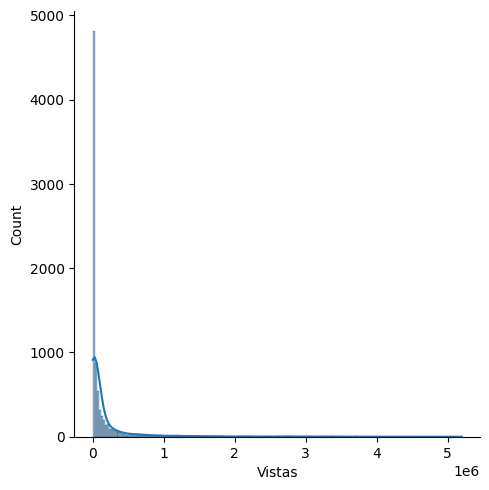

In [148]:
sns.displot(df['Vistas'], kde=True)
sns.despine()

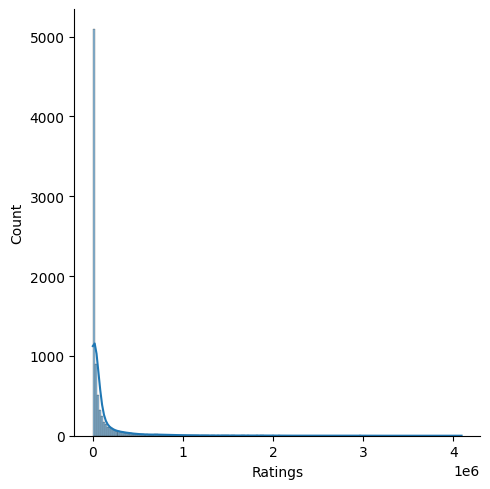

In [149]:
sns.displot(df['Ratings'], kde=True)
sns.despine()

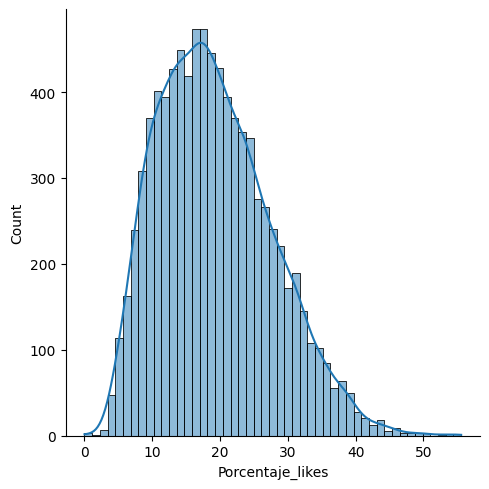

In [150]:
sns.displot(df['Porcentaje_likes'], kde=True)
sns.despine()

La columna Vistas, Ratings y Porcentaje_likes presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

## *Vistas*

In [151]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# L√≠mites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1254
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
...       ...
9933   367484
9934   304029
9967   328284
9968   697663
9978   889283

[1254 rows x 1 columns]


In [152]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificaci√≥n_promedio           Genero  Duraci√≥n         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  Englis

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

## *Puntuaciones*

In [153]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# L√≠mites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1243
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
...       ...
9933   316501
9934   262071
9967   243736
9968   633397
9978   782412

[1243 rows x 1 columns]


In [154]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificaci√≥n_promedio           Genero  Duraci√≥n         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  Englis

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto tambi√©n se conservaran estos valores

## *Porcentaje_likes*

In [155]:
Q1 = df['Porcentaje_likes'].quantile(0.25)
Q3 = df['Porcentaje_likes'].quantile(0.75)
IQR = Q3 - Q1

# L√≠mites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Porcentaje_likes'] < limite_inferior) | (df['Porcentaje_likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Porcentaje_likes']])

Cantidad de outliers encontrados: 57
      Porcentaje_likes
21           47.094243
80           46.531302
108          43.409498
243          47.909539
265          45.961517
280          44.596920
495          43.990640
587          43.317558
610          45.567265
884          44.253989
1531         43.919918
1791         43.324516
1891         43.684645
1920         45.474817
1923         45.384682
2158         45.144426
2185         52.279308
2577         43.334153
3158         45.359116
4156         42.723896
4218         44.018715
4373         42.630680
4375         44.145659
4399         43.840399
4690         42.492814
4747         43.877945
4871         42.888852
5654         49.241539
5811         43.063306
6024         42.812797
6720         50.358195
6759         45.283019
6985         43.442024
7018         50.000000
7106         43.893014
7332         45.662606
7554         54.452456
7567         47.235237
7673         43.746827
7943         43.589744
8393         43.7650

Cuando analizamos los outliers de la variable Porcentaje_likes observamos que son valores que podria tomar la variable si la pelicula le gusto a mas del 50% del p√∫blico que la vio. Por lo tanto, se conservar√°n estos valores.

# **Escalado de variables**

Estandarizaci√≥n (Z-score): Calificaci√≥n_promedio y Duraci√≥n (variables con distribuci√≥n normal)

In [156]:
#Importamos la libreria
from scipy.stats import zscore

In [157]:
#Aplicamos z-score
df['Calificaci√≥n_promedio_zscore'] = zscore(df['Calificaci√≥n_promedio'])

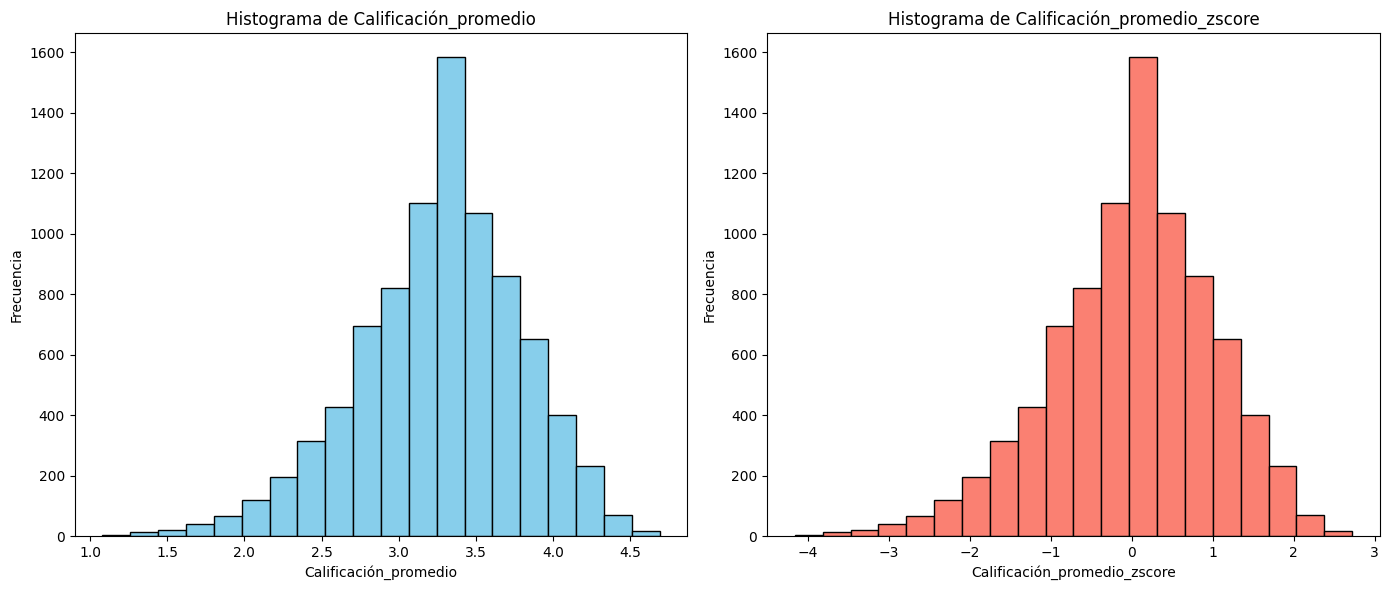

In [158]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Calificaci√≥n_promedio'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Calificaci√≥n_promedio')
axes[0].set_xlabel('Calificaci√≥n_promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Calificaci√≥n_promedio_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Calificaci√≥n_promedio_zscore')
axes[1].set_xlabel('Calificaci√≥n_promedio_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Procedemos de la misma forma con la variable duraci√≥n

In [159]:
#Aplicamos z-score
df['Duraci√≥n_zscore'] = zscore(df['Duraci√≥n'])

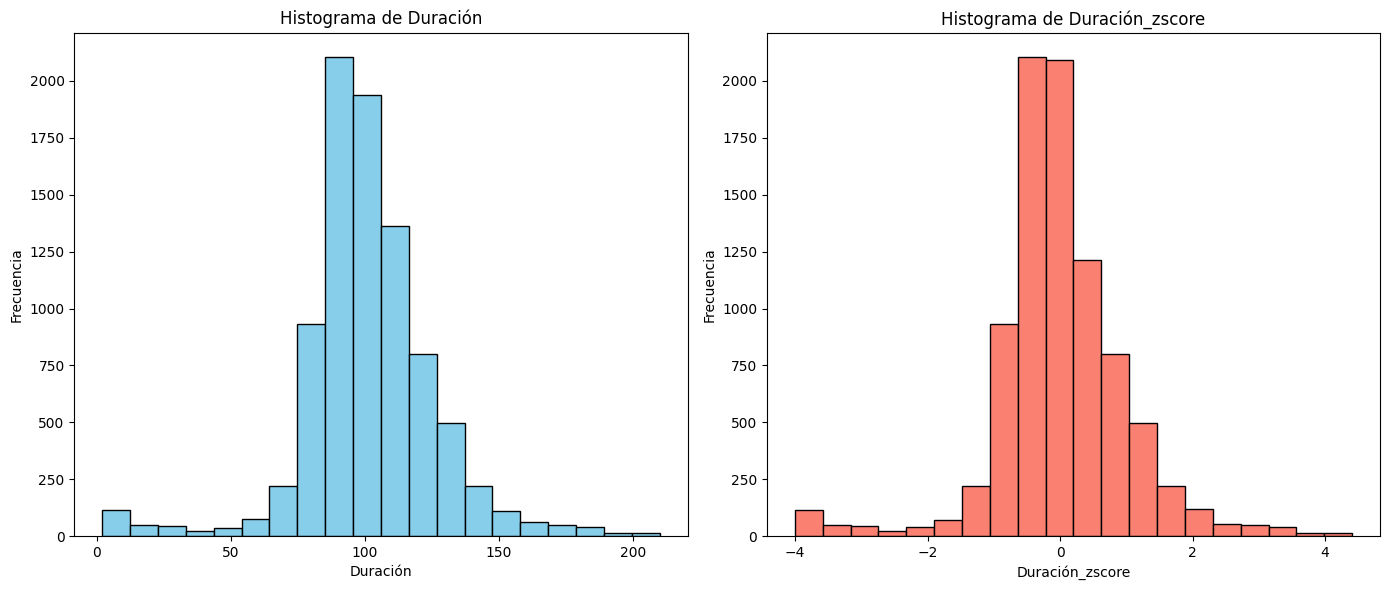

In [160]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Duraci√≥n'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Duraci√≥n')
axes[0].set_xlabel('Duraci√≥n')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Duraci√≥n_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Duraci√≥n_zscore')
axes[1].set_xlabel('Duraci√≥n_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Normalizaci√≥n (Min-Max): Vistas, Ratings, Porcentaje_likes (variables con sesgo)

In [161]:
#Aplicamos la Normalizaci√≥n Min-Max
df['Vistas_normalizadas'] = (df['Vistas'] - df['Vistas'].min()) / (df['Vistas'].max() - df['Vistas'].min())

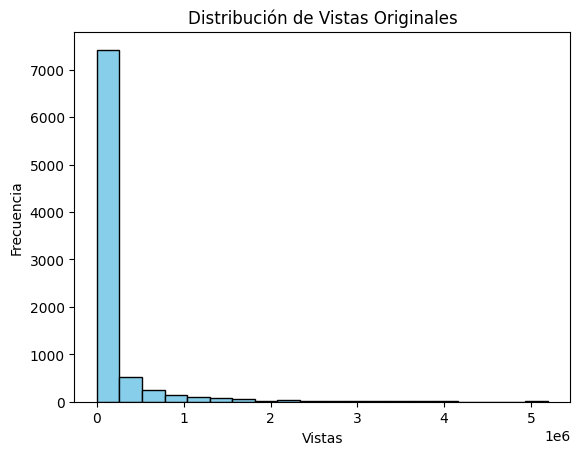

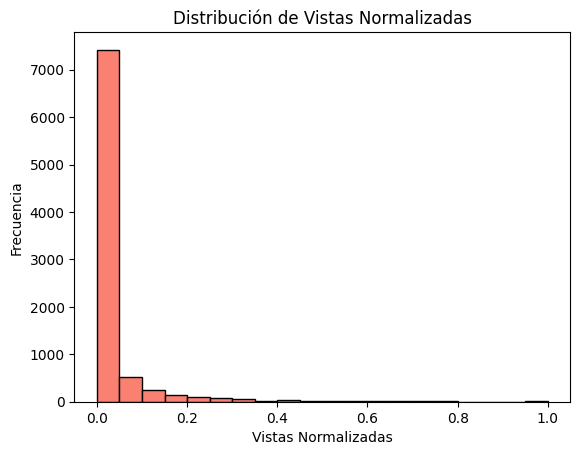

In [162]:
#Histograma de la columna original
plt.hist(df['Vistas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Vistas Originales')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Vistas_normalizadas'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuci√≥n de Vistas Normalizadas')
plt.xlabel('Vistas Normalizadas')
plt.ylabel('Frecuencia')
plt.show()

In [163]:
#Aplicamos la Normalizaci√≥n Min-Max
df['Ratings_normalizados'] = (df['Ratings'] - df['Ratings'].min()) / (df['Ratings'].max() - df['Ratings'].min())

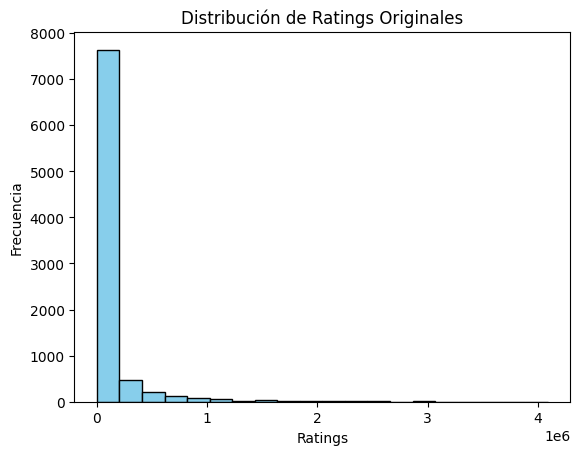

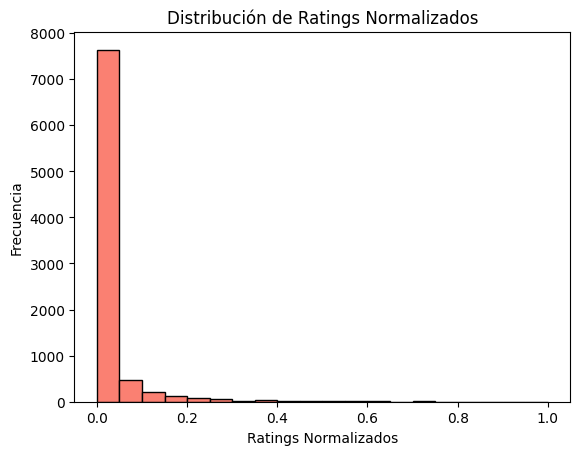

In [164]:
# Histograma de la columna original
plt.hist(df['Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Ratings Originales')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Ratings_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuci√≥n de Ratings Normalizados')
plt.xlabel('Ratings Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [165]:
#Aplicamos la Normalizaci√≥n Min-Max
df['Porcentaje_likes_normalizado'] = (df['Porcentaje_likes'] - df['Porcentaje_likes'].min()) / (df['Porcentaje_likes'].max() - df['Porcentaje_likes'].min())

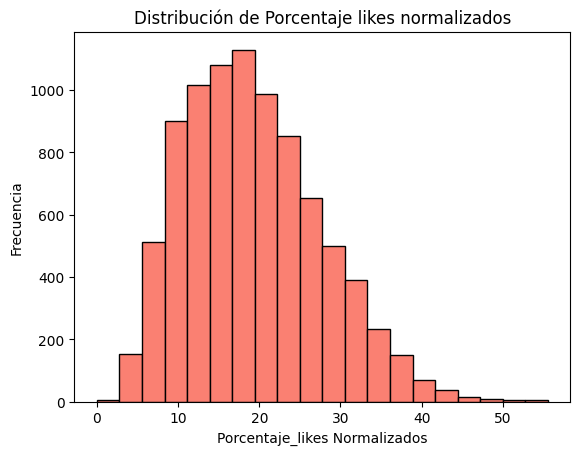

In [166]:
# Histograma de la columna normalizada
plt.hist(df['Porcentaje_likes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuci√≥n de Porcentaje likes normalizados')
plt.xlabel('Porcentaje_likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

# **Analisis exploratorio luego de la estandarizaci√≥n y normalizaci√≥n.**

In [167]:
df.dtypes

Titulo                           object
Director                         object
Calificaci√≥n_promedio           float64
Genero                           object
Duraci√≥n                        float64
Pais                             object
Lenguaje                         object
Descripci√≥n                      object
Productora                       object
Vistas                            int64
Ratings                           int64
Protagonista                     object
Coprotagonista                   object
Porcentaje_likes                float64
zscore                          float64
is_series                          bool
Calificaci√≥n_promedio_zscore    float64
Duraci√≥n_zscore                 float64
Vistas_normalizadas             float64
Ratings_normalizados            float64
Porcentaje_likes_normalizado    float64
dtype: object

Eliminacion de columnas que no utilizaremos para la elaboracion del modelo supervisado. Respecto a las variables num√©ricas se conservar√°n las columnas estandarizadas o normalizadas. Las categoricas que son de interes para nuestro analisis ser√°n exploradas y transformadas con Get Dummies a continuaci√≥n.

In [168]:
df = df.drop(columns=['Titulo' , 'Calificaci√≥n_promedio' , 'Duraci√≥n' , 'Descripci√≥n' , 'Vistas' , 'Ratings' , 'Porcentaje_likes' , 'zscore' , 'is_series'])

In [169]:
df.dtypes

Director                         object
Genero                           object
Pais                             object
Lenguaje                         object
Productora                       object
Protagonista                     object
Coprotagonista                   object
Calificaci√≥n_promedio_zscore    float64
Duraci√≥n_zscore                 float64
Vistas_normalizadas             float64
Ratings_normalizados            float64
Porcentaje_likes_normalizado    float64
dtype: object

Cambiamos los nombres de las columnas normalizadas y estandarizadas

In [170]:
df = df.rename(columns={'Calificaci√≥n_promedio_zscore' : 'Calificaci√≥n' , 'Duraci√≥n_zscore' : 'Duraci√≥n', 'Vistas_normalizadas' : 'Vistas' , 'Ratings_normalizados' : 'Ratings' , 'Porcentaje_likes_normalizado' : 'Porcentaje_likes'})
print(df.columns)

Index(['Director', 'Genero', 'Pais', 'Lenguaje', 'Productora', 'Protagonista',
       'Coprotagonista', 'Calificaci√≥n', 'Duraci√≥n', 'Vistas', 'Ratings',
       'Porcentaje_likes'],
      dtype='object')


## Transformacion de datos categ√≥ricos One Hot Encoding

Debido a que las variables a transformar son categ√≥ricas y no tienen un orden predeterminado utilizaremos OneHotEncoding

In [171]:
# Especificamos las columnas categ√≥ricas que necesitamos transformar
columnas_categoricas = ['Director', 'Genero' , 'Pais' , 'Lenguaje', 'Productora', 'Protagonista' , 'Coprotagonista']

# Aplicamos One Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas)

# Vemos los resultados aplicados a las primeras filas
print(df.head())

# Guardardamos el nuevo DataFrame a CSV
df.to_csv("Movie_Data_File_Codificado.csv", index=False)

   Calificaci√≥n  Duraci√≥n    Vistas   Ratings  Porcentaje_likes  Director_  \
0      0.586997 -0.364805  0.002471  0.002210          0.527482      False   
1      1.750081  0.808617  0.479014  0.411238          0.670854      False   
3      1.006470  0.039823  0.307225  0.263246          0.556229      False   
4      1.940750  0.930005  0.168043  0.146838          0.704207      False   
6      0.873001 -0.041102  0.054638  0.044959          0.543970      False   

   Director_A.V. Rockwell  Director_Aaron B. Koontz  Director_Aaron Blaise  \
0                   False                     False                  False   
1                   False                     False                  False   
3                   False                     False                  False   
4                   False                     False                  False   
6                   False                     False                  False   

   Director_Aaron Hann  ...  Coprotagonista_Zo√´ Kravitz  \


# **Aprendizaje supervisado**

In [173]:
df = pd.read_csv('Movie_Data_File_Codificado.csv')

Utilizaremos Calificaci√≥n como target. Debido a que Calificaci√≥n es una variable num√©rica continua utilizaremos modelos de aprendizaje supervisado de regresi√≥n.

## *Arbol de desici√≥n*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Definimos la variable target y los features
y = df['Calificaci√≥n']  # variable a predecir
X = df.drop(columns=['Calificaci√≥n'])  # el resto son variables predictoras

In [ ]:
#Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
#Creamos y entrenamos el modelo de √°rbol de decisi√≥n
modelo = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [227]:
#Realizamos predicciones
predicciones = modelo.predict(X_test)

In [228]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadr√°tico medio (MSE): {mse:.2f}")

Error cuadr√°tico medio (MSE): 0.28


In [229]:
#Vemos la distribuci√≥n de la variable Calificaci√≥n para interpretar el MSE
print(df['Calificaci√≥n'].describe())

count    8.704000e+03
mean     5.975612e-16
std      1.000057e+00
min     -4.160671e+00
25%     -6.142201e-01
50%      1.244227e-02
75%      6.823320e-01
max      2.722495e+00
Name: Calificaci√≥n, dtype: float64


**Seg√∫n la distribuci√≥n de la variable Calificai√≥n el MSE 0.31 significa que el modelo se equivoca en promedio 0.55 desviaciones est√°ndar, valor aceptable. Ajustamos algunos hiperparametros al modelo y lo volevmos a ejecutar.**

In [230]:
#Definimos la variable target y los features
y = df['Calificaci√≥n']  # variable a predecir
X = df.drop(columns=['Calificaci√≥n'])  # el resto son variables predictoras

# 2. Convertir variables categ√≥ricas a variables dummy (one-hot)
X = pd.get_dummies(X, drop_first=True)

In [231]:
#Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [232]:
#Creamos y entrenamos el modelo de √°rbol de decisi√≥n
modelo = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [233]:
#Hacemos las predicciones
predicciones = modelo.predict(X_test)

# 4. Crear y entrenar modelo
modelo = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [234]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadr√°tico medio (MSE): {mse:.2f}")

Error cuadr√°tico medio (MSE): 0.28


Efectivamente, con los ajustes realizados, el modelo mejora su capacidad predictiva, reduciendo el error cuadr√°tico medio (MSE) de 0.31 a 0.28. 

#Verificar Overfitting

In [235]:
# Predicciones en entrenamiento
y_train_pred = modelo.predict(X_train)

# M√©tricas en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# M√©tricas en prueba
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Entrenamiento: MSE={mse_train}")
print(f"Prueba: MSE={mse_test}")

Entrenamiento: MSE=0.24464385210158718
Prueba: MSE=0.21736776492928597


El modelo tiene un buen ajuste, ya que el error en el conjunto de entrenamiento y el de prueba son similares y bajos, lo que indica que no hay sobreajuste (overfitting) significativo.

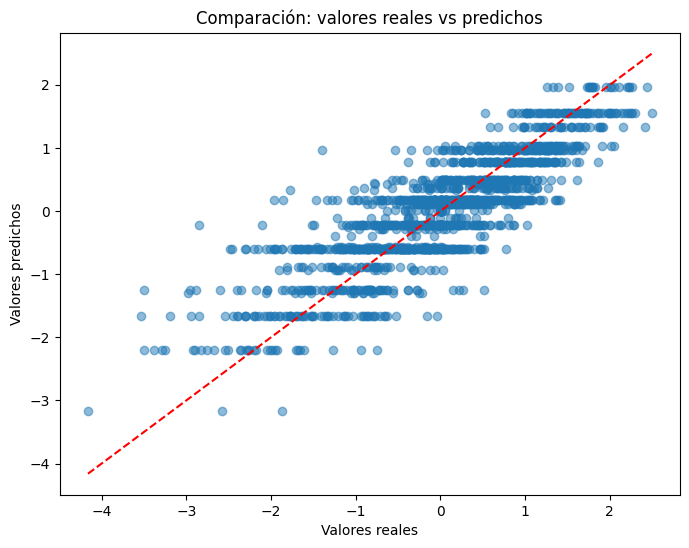

In [249]:
# Predicciones para el conjunto de prueba
y_pred = modelo.predict(X_test)

# Graficar valores reales vs predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # l√≠nea diagonal ideal
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparaci√≥n: valores reales vs predichos')
plt.show()

## *Random Forest*

In [236]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [237]:
# Separamos variables predictoras y target
X = df.drop(columns=['Calificaci√≥n'])
y = df['Calificaci√≥n']

# Divisi√≥n del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
#Creamos y entrenamos el modelo
modelo_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

In [239]:
# Evaluamos modelo base
y_pred = modelo_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Modelo base")
print(f" MSE:  {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R¬≤:   {r2:.4f}")

Random Forest - Modelo base
 MSE:  0.2552
 RMSE: 0.5052
 R¬≤:   0.7404


El modelo Random Forest ajusta mejor que el arbol de desici√≥n realizado anteriormente. El MSE disminuy√≥ y el modelo explica el 78% de la varianza.

### *Gr√°fico de Random Forest*

In [240]:
from sklearn.tree import plot_tree

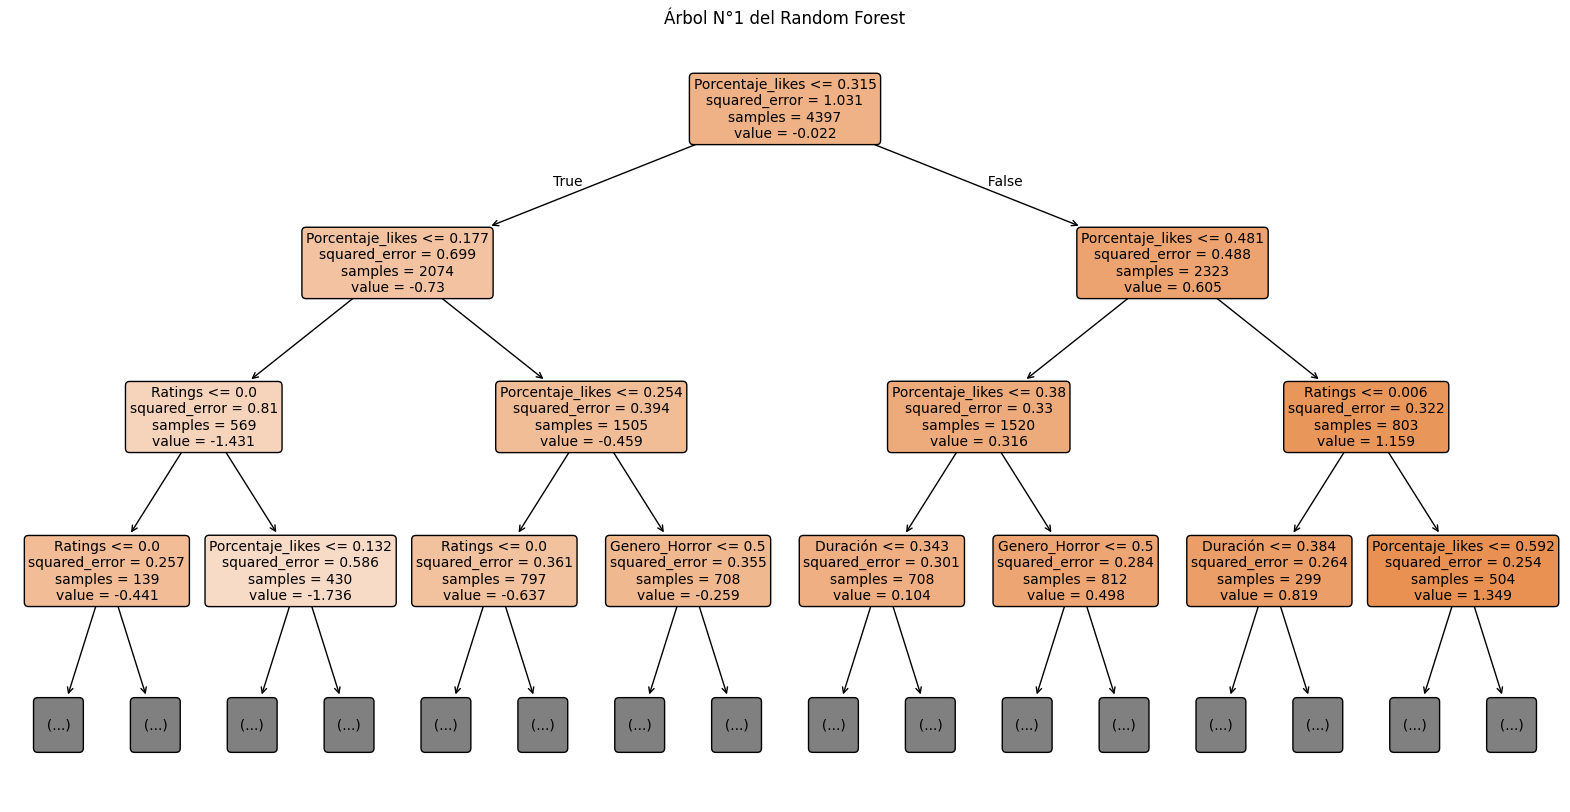

In [241]:
#Elegimos el primer √°rbol del bosque entrenado
arbol = modelo_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(arbol,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title("√Årbol N¬∞1 del Random Forest")
plt.show()

**Siguiendo con el an√°lisis del modelo Random Forest continuamos estableciendo la importancia de las variables**

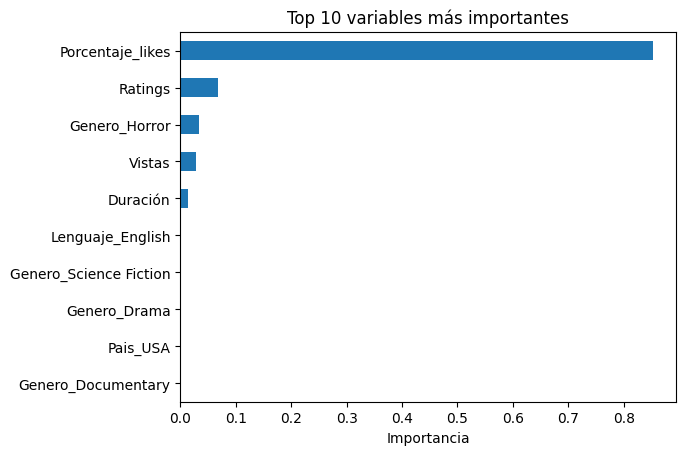

In [242]:
importancia = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancia.nlargest(10).plot(kind='barh')
plt.title('Top 10 variables m√°s importantes')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

El porcentaje de likes sobre el total de vistas es la variable m√°s importante para predecir la calificaci√≥n, seguido por el Ratings y las vistas. Debido a la transformaci√≥n de la variable g√©nero el modelo ahora ve cada g√©nero como una variable diferente, y calcula su importancia individual. Por lo tanto, observamos que el g√©nero Horror es el que mas impacta en la variable Calificaci√≥n. La duraci√≥n es otra variable importante en la definici√≥n de la clasificaci√≥n. La variable Lenguaje en Ingles tambien impacta en la calificaci√≥n.

### *Aplicaci√≥n de GridSearchCV al Random Forest*

In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [244]:
#Definimos el modelo base para pasarle al grid
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [245]:
# Reduccion del espacio de b√∫squeda
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

In [246]:
#Creamos el GridSearchCV
grid_search = GridSearchCV(
    estimator= rf,
    param_grid= param_grid,
    cv=5,
    scoring= 'neg_mean_squared_error',
    n_jobs= -1,
)

In [251]:
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [10, 20]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid,
                           cv=3,
                           n_jobs=1,  # Para no paralelizar y consumir menos memoria
                           verbose=1)

#entrenar modelo
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [10, 20]},
             verbose=1)

In [252]:
#mejores hiperpar√°metros
print("Mejores par√°metros encontrados:")
print(grid_search.best_params_)

Mejores par√°metros encontrados:
{'max_depth': 10, 'min_samples_split': 20}


In [253]:
# Evaluamos el set de prueba
mejor_modelo = grid_search.best_estimator_

In [254]:
# Evaluamos el modelo optimizado
y_pred_opt = mejor_modelo.predict(X_test)

In [283]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [284]:
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R¬≤:   {r2:.4f}")

MSE:  0.2788
RMSE: 0.5280
R¬≤:   0.7164


Nuevamente observamos las variables m√°s importantes








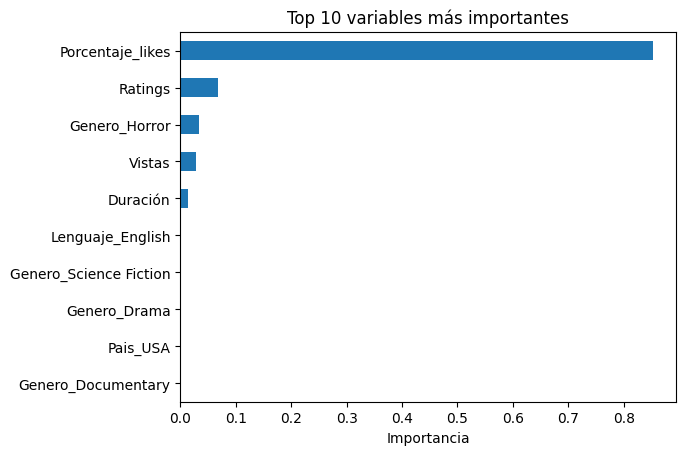

In [285]:
importancia = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancia.nlargest(10).plot(kind='barh')
plt.title('Top 10 variables m√°s importantes')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

## *Utilizaci√≥n de Cross_validation sobre el mejor modelo*

Se usa cross_val_score para calcular el error cuadr√°tico medio (MSE) con validaci√≥n cruzada, y luego lo convierten a RMSE (ra√≠z del MSE).

Este RMSE es m√°s confiable que solo evaluar sobre el test set, porque mide la estabilidad del modelo en distintos cortes del dataset.

El cross_val_score devuelve valores negativos cuando se usa scoring='neg_mean_squared_error'.

In [288]:
from sklearn.model_selection import cross_val_score

# Ya deber√≠as haber ejecutado GridSearchCV antes de esto
mejor_modelo = grid_search.best_estimator_

# Validaci√≥n cruzada con k=5
scores = cross_val_score(mejor_modelo, X, y, cv=5, scoring='neg_mean_squared_error')

# C√°lculo de RMSE promedio
rmse_cv = (-scores.mean())**0.5
print(f"üìâ RMSE promedio con validaci√≥n cruzada (CV=5): {rmse_cv:.4f}")


üìâ RMSE promedio con validaci√≥n cruzada (CV=5): 0.4940


Este resultado indica que, en promedio, la diferencia entre las predicciones y los valores reales es de aproximadamente 0.49 unidades en la escala de la variable objetivo. Este resultado refleja un desempe√±o estable y consistente del modelo en distintos subconjuntos de datos, sugiriendo que no hay un sobreajuste significativo.

## Curva de aprendizaje

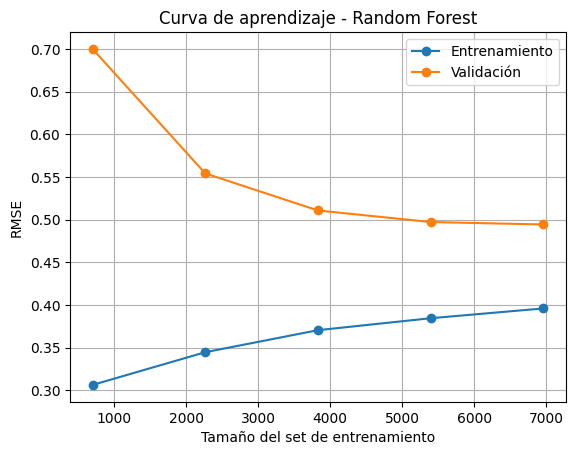

In [290]:
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=1
)

# Convertir las puntuaciones negativas a positivas (MSE)
train_scores_mean = (-train_scores).mean(axis=1)
test_scores_mean = (-test_scores).mean(axis=1)

# Graficar RMSE para entrenamiento y validaci√≥n
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', label="Entrenamiento")
plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', label="Validaci√≥n")
plt.xlabel("Tama√±o del set de entrenamiento")
plt.ylabel("RMSE")
plt.title("Curva de aprendizaje - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

El hecho de que la curva de entrenamiento suba y la de validaci√≥n baje o se estabilice horizontalmente indica que el modelo se est√° ajustando correctamente y est√° aprendiendo.

Si las dos curvas se acercan y quedan relativamente cerca, significa que hay poco sobreajuste ni subajuste.

## Comparaci√≥n con Regresi√≥n Lineal

In [291]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(" Regresi√≥n Lineal")
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R¬≤:   {r2_lr:.4f}")


 Regresi√≥n Lineal
MSE:  0.9488
RMSE: 0.9741
R¬≤:   0.0348


La regresi√≥n lineal presenta un rendimiento menor al Random Forest (mayor error, menor R¬≤). Esto indica que la relaci√≥n entre las variables predictoras y la variable objetivo no es lineal, por lo que un modelo m√°s flexible como Random Forest logra capturar mejor la complejidad y las interacciones presentes en los datos.

# Conclusi√≥n

El modelo Random Forest optimizado mediante GridSearchCV ofrece el mejor desempe√±o predictivo, superando ampliamente al √°rbol de decisi√≥n y a la regresi√≥n lineal.

La validaci√≥n cruzada confirma que los resultados son estables.

Las variables m√°s importantes para predecir la calificaci√≥n son:

Porcentaje de likes

Ratings

G√©nero (especialmente Horror)

Duraci√≥n

Idioma ingl√©s

El modelo tiene un buen equilibrio entre sesgo y varianza, como lo muestra la curva de aprendizaje.

Esta metodolog√≠a puede trasladarse f√°cilmente a nuevos conjuntos de datos del dominio audiovisual o extenderse a clasificaci√≥n si cambiara el target.